# logistic regression 

# binary classification problem

sigmoid function work with calculate probabily for the logistic regression 

range 0 to 1

threshold work 0.5 up predict 1

thereshold work 0.5 below predict 0

# evalution classification model included logistic regression

1.accuracy

2.recall

3.precision

4.f1score

5.confusion matrix

6.auc(area of under cover)

7.roc(reciever opreater chacterizes)

# ACCURACY

ACUURACY = TP + TN/(FP+TP+TN+FN)

# RECALLOR SENSEVITIY

RECALL = TRUE POSITIVE(TP)/TRUE POSITIVE+FALSE NEGATIVE(TP+FN)

RECALL = TP/TP+FN

# PRECISION

PRECISION = TP/TP+FP

# F1 SCORE

F1 SCORE = 2*(PRECISION*RECALL)/(PRECISION+REACALL)

# SPECIFICITY OR TRUE NEGATIVE RATE

= TN/TN+FP

FALSE POSIVE RATE = FP/FP+TN

# ROC 

CHECK THE TRUE POSITIVE RATE AND FALSE POSITIVE RATE

# PROBLEM STATEMENT

PREDICT THE DIABITIES AND NON DIABITIES

# LABEL

OUTCOME

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\DATABASE SQL\\diabites.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# data description

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
type(df)

pandas.core.frame.DataFrame

# stats and graphical data analysis

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


count=all same data no null value


In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

# check the distribution

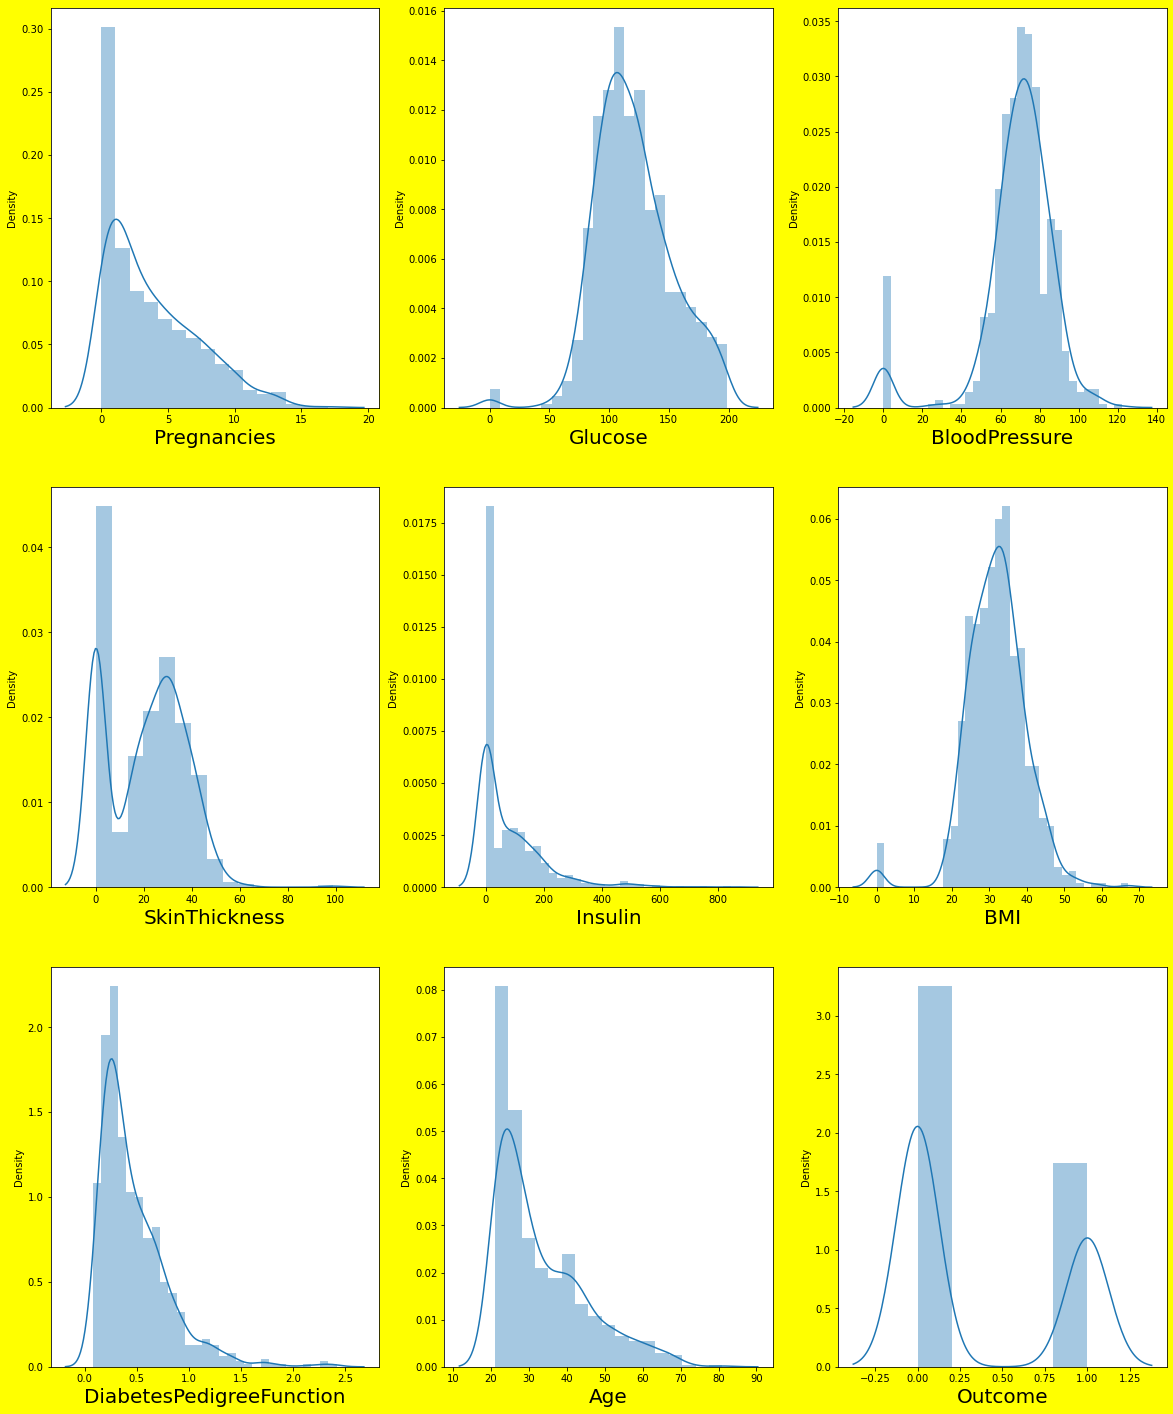

In [19]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

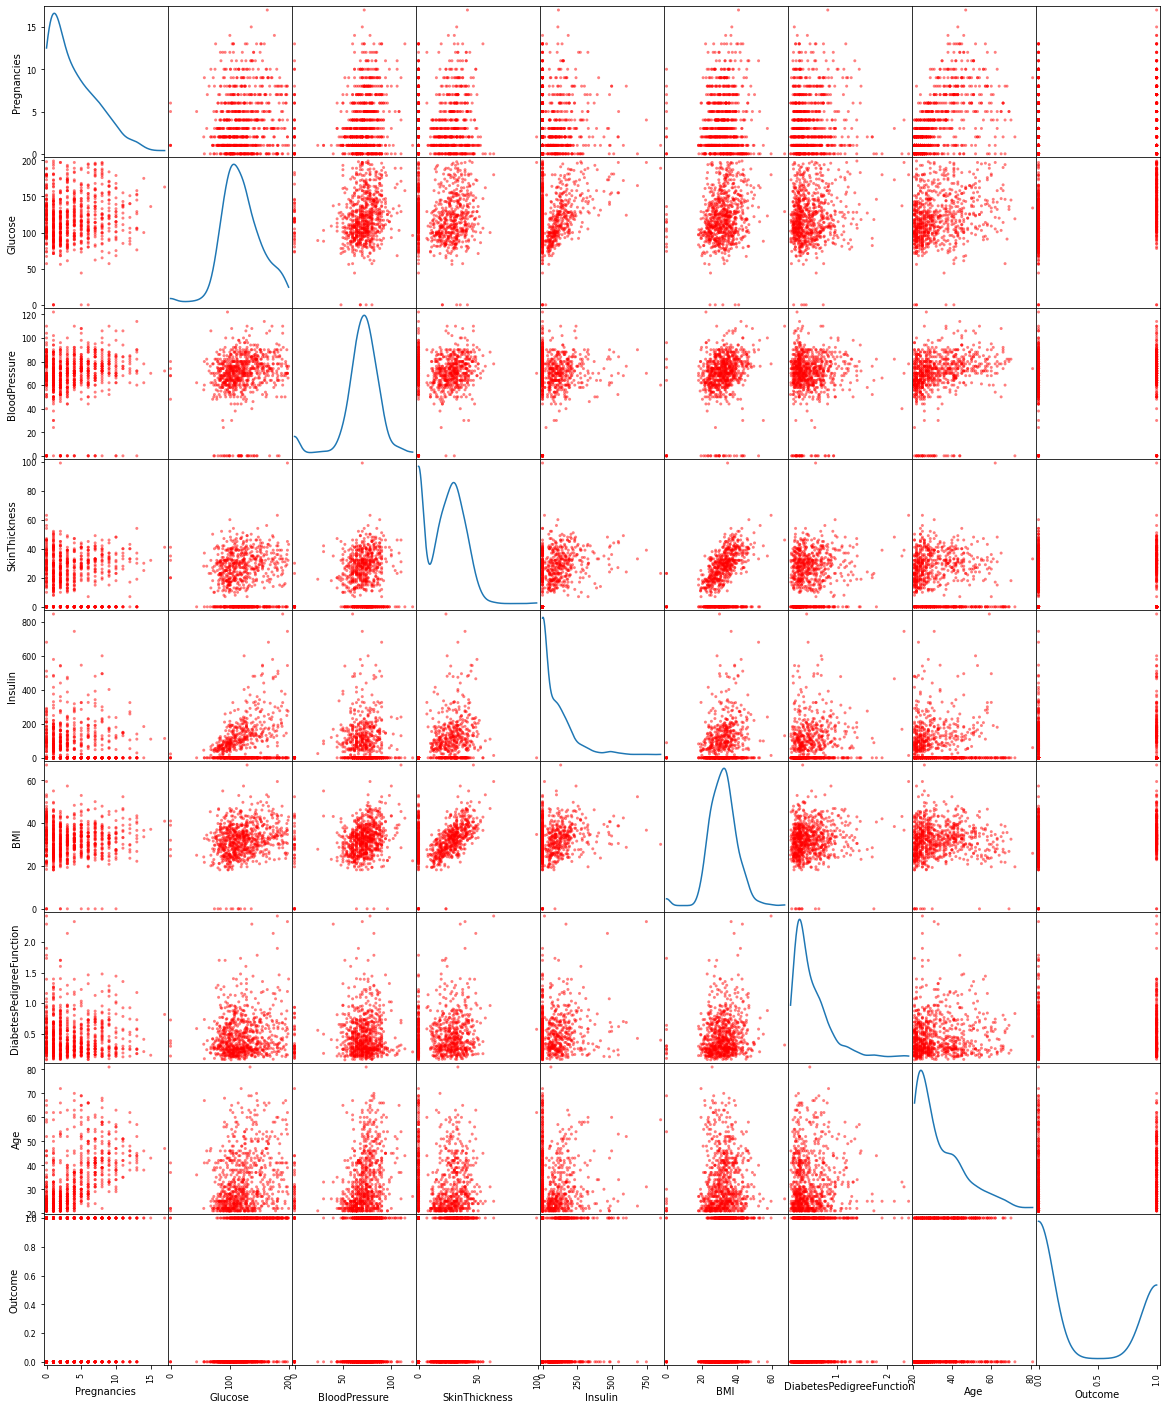

In [20]:
scatter_matrix(df,color='r',figsize=(20,25),diagonal='kde')
plt.show()

some columns not follow normal distribution

or have some skewness

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


some columns has some 0 value

In [22]:
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


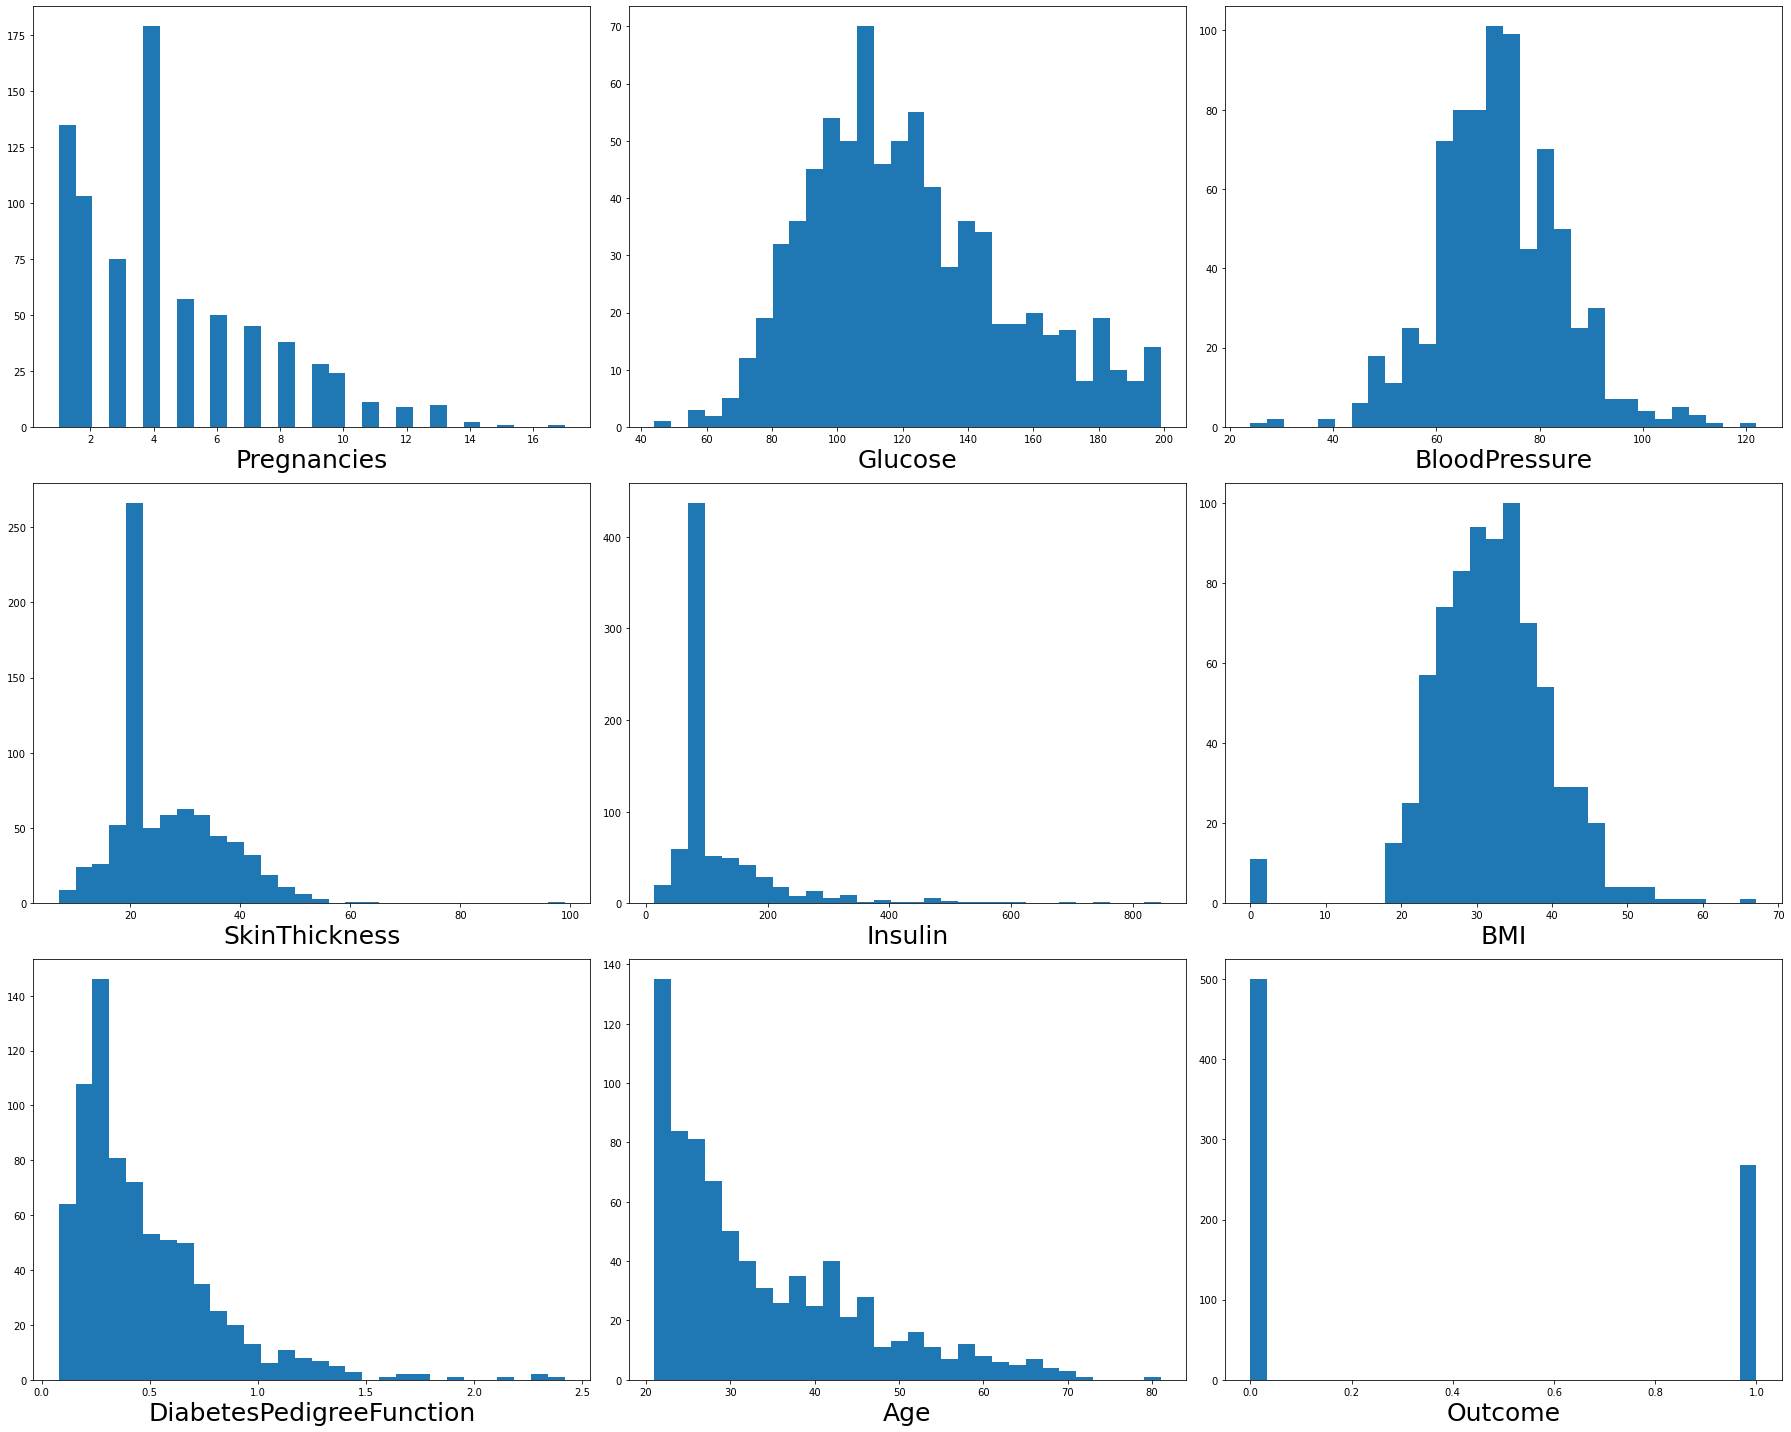

In [24]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()

In [26]:
sk = df.skew()

In [28]:
sk[np.abs(sk)<0.5].all()

True

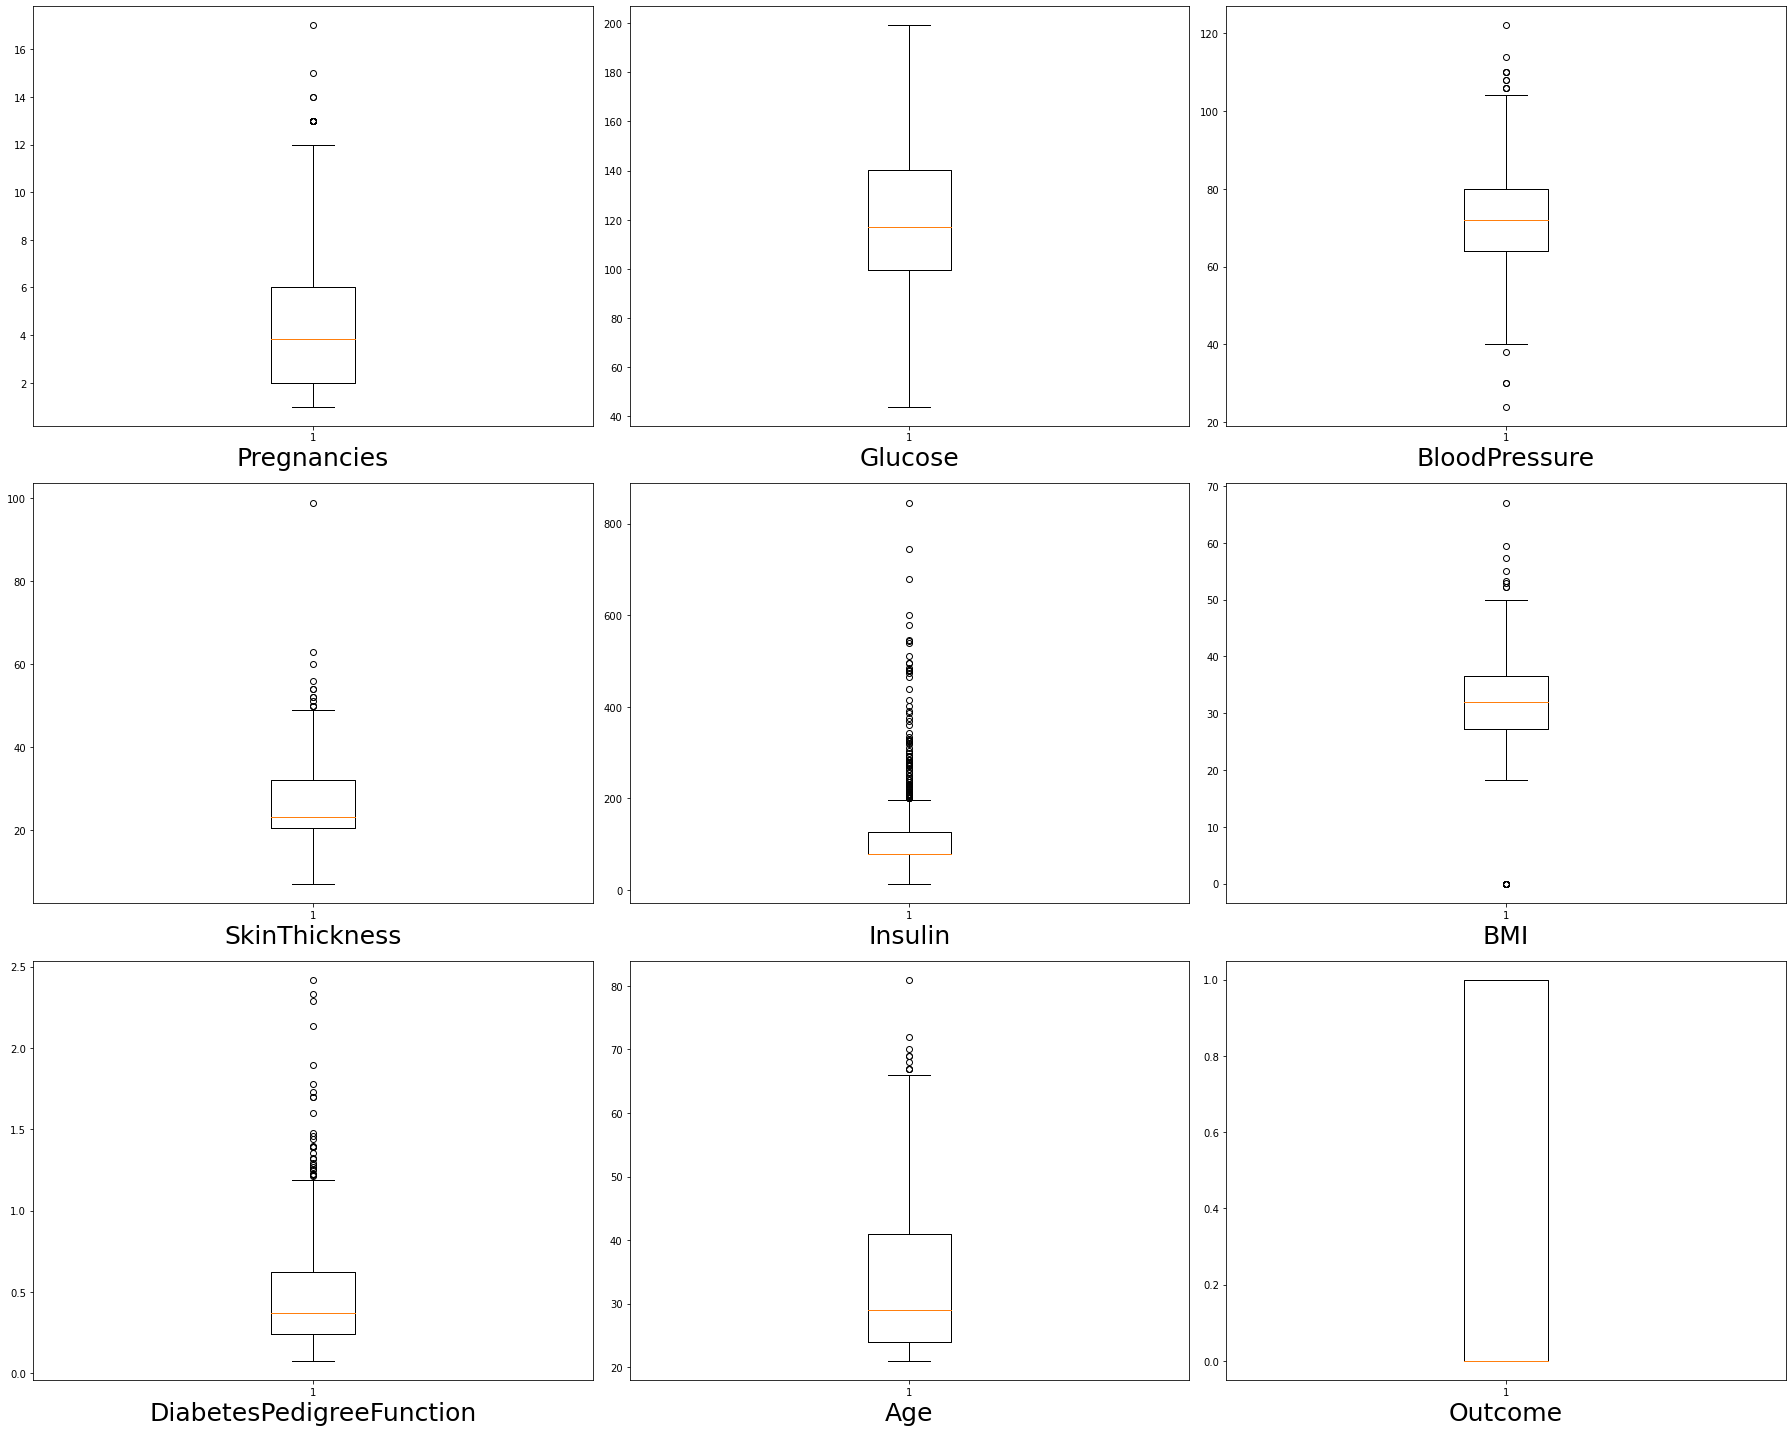

In [29]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()   

have some outliers

In [30]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [31]:
iqr = q3-q1

In [32]:
iqr

Pregnancies                  4.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.300000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64

In [33]:
q1

Pregnancies                  2.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.300000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

In [35]:
q3

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

In [36]:
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)

In [38]:
upper_fence

Pregnancies                  12.000000
Glucose                     201.000000
BloodPressure               104.000000
SkinThickness                49.195312
Insulin                     198.425781
BMI                          50.550000
DiabetesPedigreeFunction      1.200000
Age                          66.500000
Outcome                       2.500000
dtype: float64

In [37]:
lower_fence

Pregnancies                 -4.000000
Glucose                     39.000000
BloodPressure               40.000000
SkinThickness                3.341146
Insulin                      8.623698
BMI                         13.350000
DiabetesPedigreeFunction    -0.330000
Age                         -1.500000
Outcome                     -1.500000
dtype: float64

In [39]:
preg_high = (q3.Pregnancies+(1.5*iqr.Pregnancies))
preg_high

12.0

In [40]:
index = np.where(df['Pregnancies']>12.0)

In [41]:
index

(array([ 28,  72,  86,  88, 159, 274, 298, 323, 357, 455, 518, 635, 691,
        744], dtype=int64),)

In [42]:
df = df.drop(df.index[index])
df.shape

(754, 9)

# 2 method

In [43]:
print('Highest allowed',df['BloodPressure'].mean()+3*df['BloodPressure'].std())
print('Lowest allowed',df['BloodPressure'].mean()-3*df['BloodPressure'].std())

Highest allowed 108.3388113957617
Lowest allowed 35.965130083018146


In [44]:
df = df[(df['BloodPressure']<108.3388113957617)&(df['BloodPressure']>35.965130083018146 )]

In [45]:
df.shape

(747, 9)

In [46]:
df.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
742,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
743,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
744,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
745,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


# 3erd method

In [47]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  4,   8,   9,  13,  42,  46,  54,  55,  57,  77,  80, 104, 113,
        116, 137, 145, 176, 210, 218, 218, 237, 238, 275, 317, 348, 356,
        356, 357, 357, 378, 381, 395, 401, 412, 431, 431, 431, 439, 444,
        471, 479, 506, 562, 567, 576, 603, 626, 636, 647, 654, 665, 665,
        675, 686, 732], dtype=int64),
 array([6, 4, 5, 4, 6, 5, 3, 6, 5, 5, 2, 4, 3, 7, 5, 4, 4, 4, 4, 6, 4, 4,
        4, 6, 2, 4, 6, 5, 6, 4, 6, 4, 4, 5, 3, 5, 6, 7, 7, 4, 5, 5, 3, 4,
        6, 6, 4, 4, 7, 5, 5, 7, 4, 5, 4], dtype=int64))

In [48]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [49]:
df_new_z.shape


(698, 9)

In [50]:

data_loss = (768-698)/(768)*100
data_loss

9.114583333333332

data loss should not above 10%

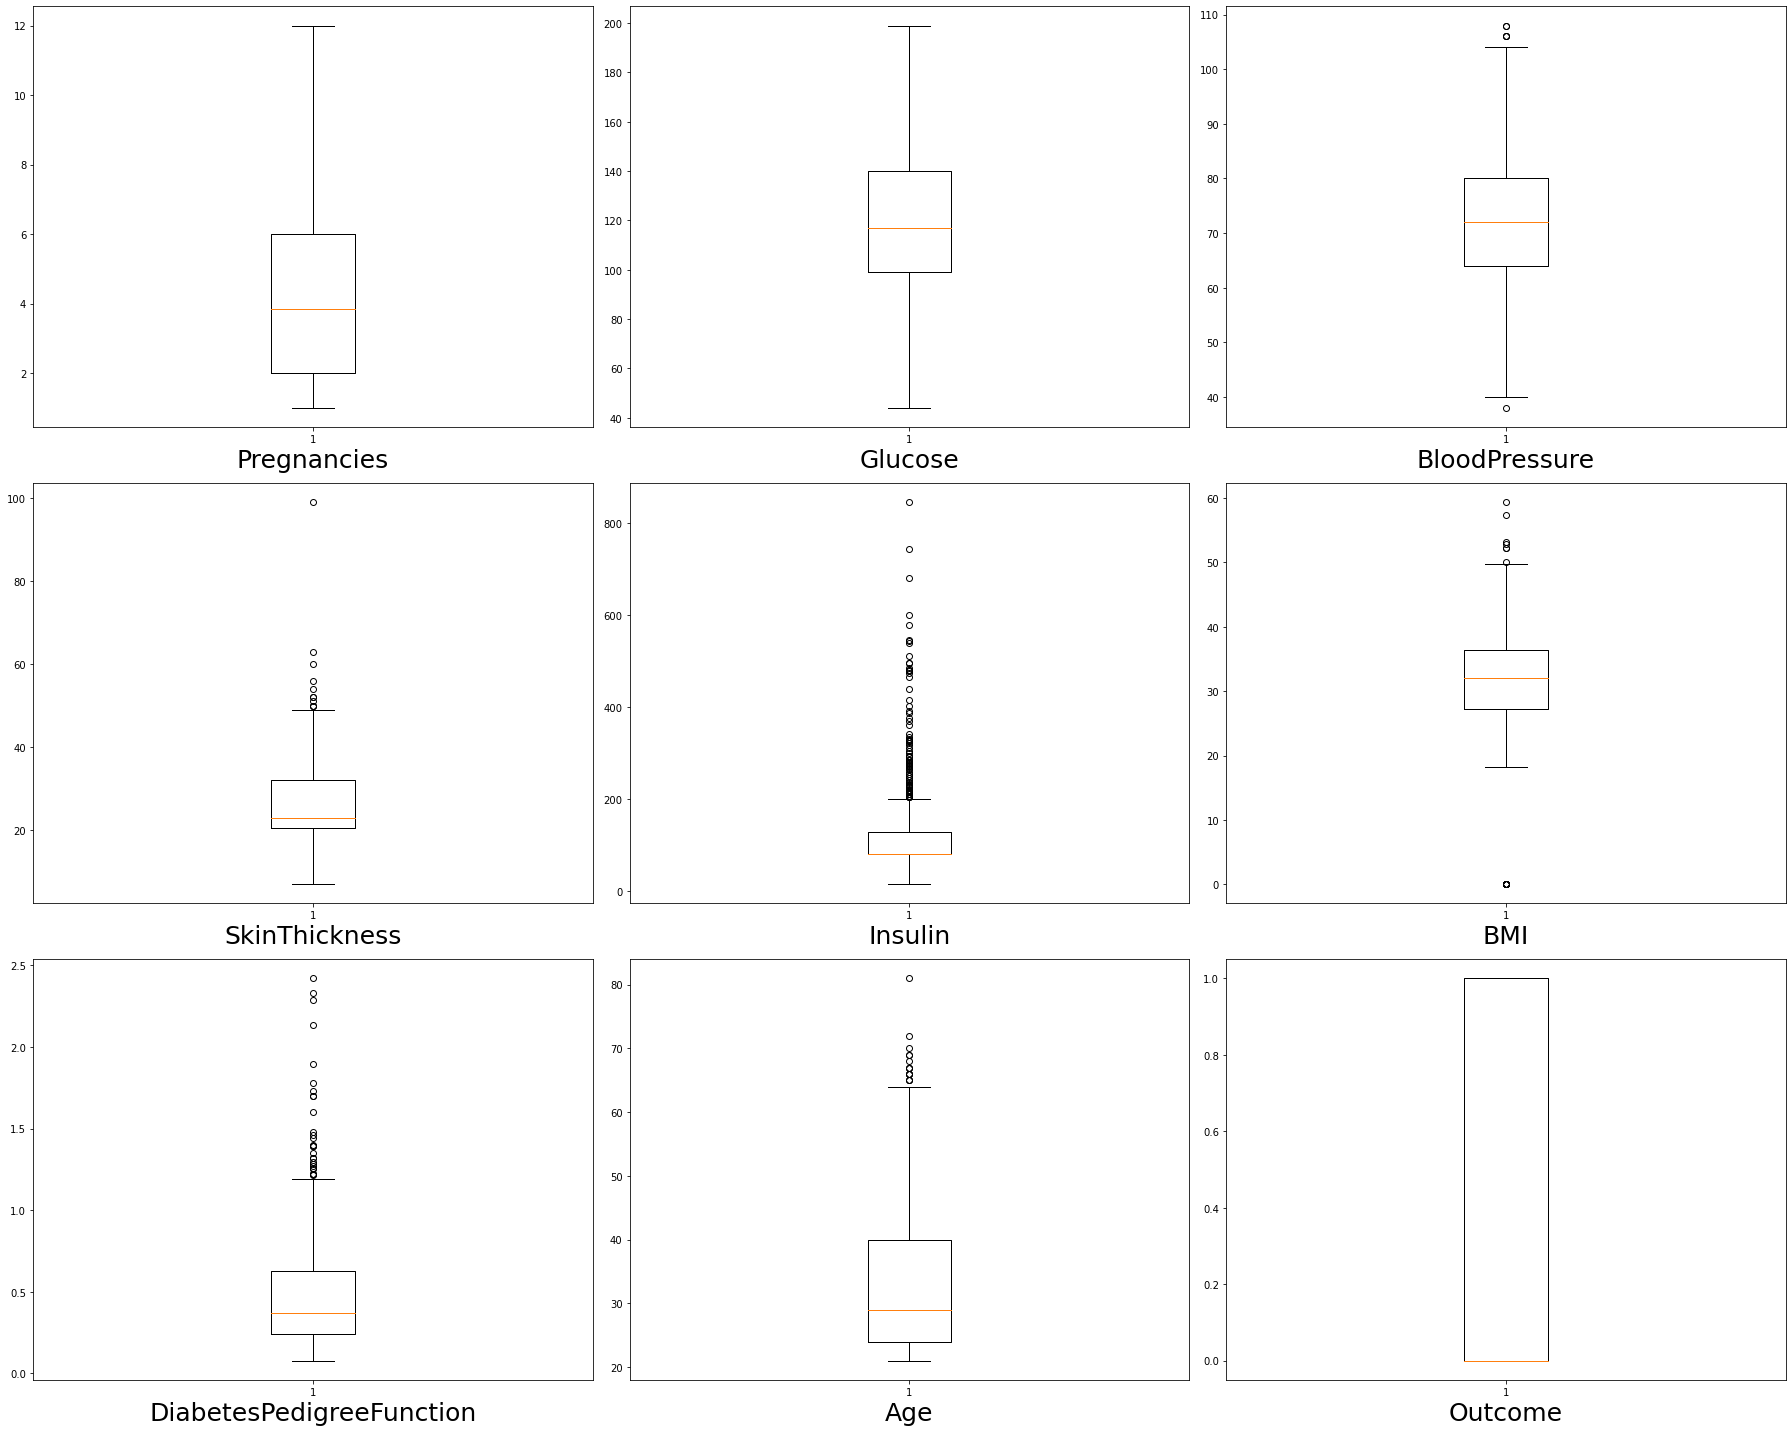

In [51]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()   

In [55]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

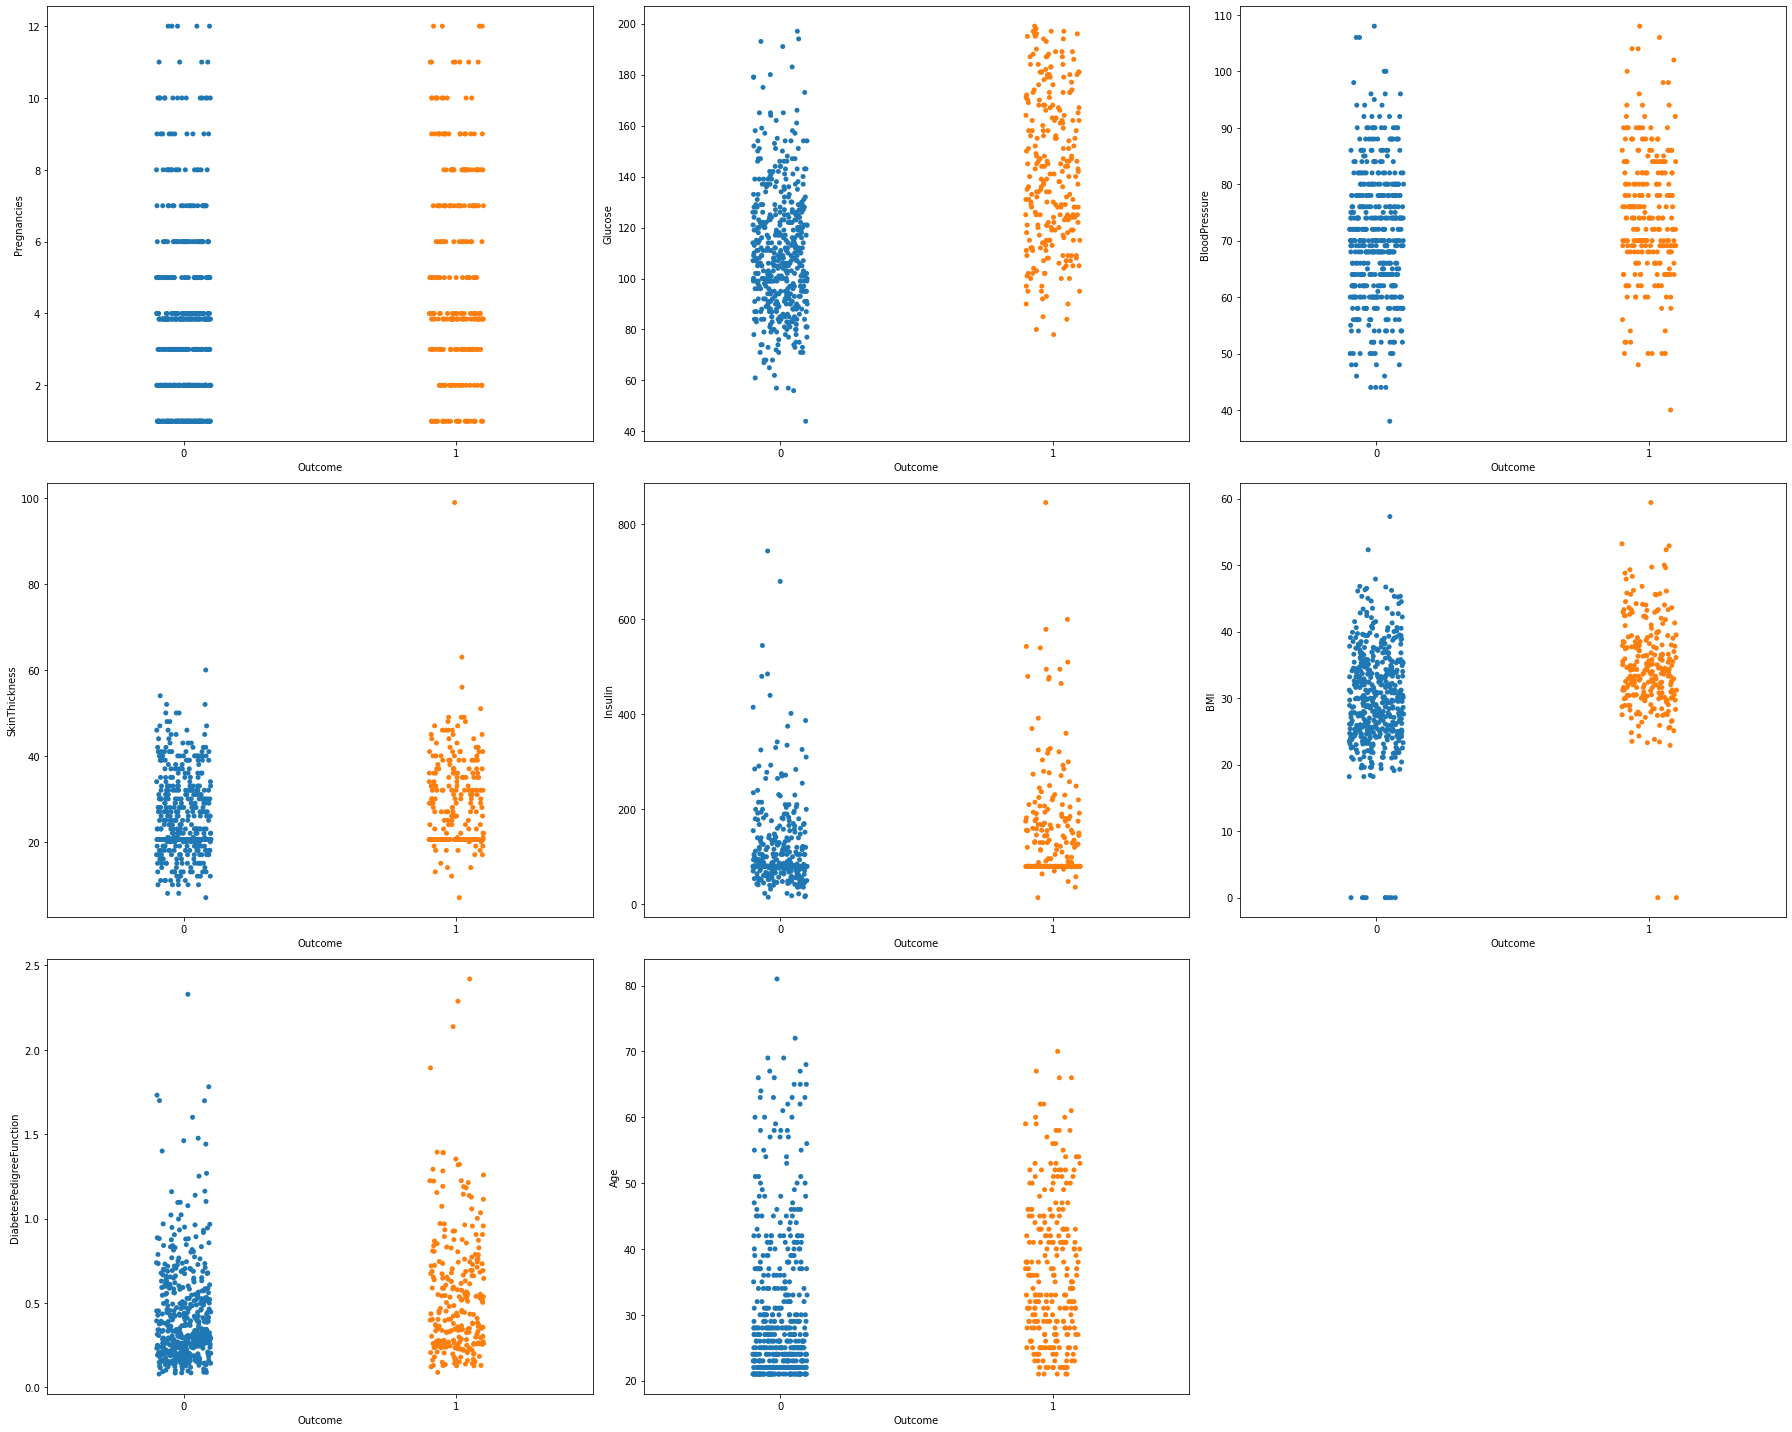

In [59]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
        
        
        
        plotnumber+=1
plt.tight_layout()   

In [ ]:
b)     